# Crossref Citation Stats

## Data Provenance

The data was retrieved in April 2018 via the [Crossref API](http://api.crossref.org/works) (the download should include everything at least up to 11st Jan 2018, having started on the 12th taking up to a week). ([The raw responses LZMA zipped](https://doi.org/10.6084/m9.figshare.6170414) take about 32 GB disk space)

## Data Preprocessing

The data was then preprocessed to get calculate some high level stats over the data which are then analysed in this notebook.

The files are available here:
* [crossref-works-summaries-stat.tsv](https://storage.googleapis.com/elife-ml/citations/by-date/2018-04-11/crossref-works-summaries-stat.tsv) - Overall summary stats
* [crossref-works-summaries-by-type-and-publisher-stat.tsv.gz](https://storage.googleapis.com/elife-ml/citations/by-date/2018-04-11/crossref-works-summaries-by-type-and-publisher-stat.tsv.gz) - Summary stats grouped by _type_ and _publisher_ 
* [crossref-works-reference-stat.tsv.gz](https://storage.googleapis.com/elife-ml/citations/by-date/2018-04-11/crossref-works-reference-stat.tsv.gz) - Stats relating to open access (oa) references

Related, but not used for the stats in this notebook:
* [citation links](https://doi.org/10.6084/m9.figshare.6170162)

## Notes

The *reference\_count* and *referenced\_by\_count* are counts provided by Crossref. *num\_references* are the number of references that are actually accessible via the API (i.e. oa).

## Scripts

The scripts can be found in [this repository](https://github.com/elifesciences/datacapsule-crossref), see [README](https://github.com/elifesciences/datacapsule-crossref/blob/analysis/README.md). Using those scripts the data can be updated (but it will take some time to retrieve all of the Crossref data).

In [1]:
%matplotlib inline

In [2]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from IPython.display import Markdown, display

In [3]:
plt.style.use('ggplot')

def printmd(string):
    display(Markdown(string))

In [4]:
data_path = '../data'
summary_stats_filename = 'crossref-works-summaries-stat.tsv'
summary_by_type_and_publisher_stats_filename = 'crossref-works-summaries-by-type-and-publisher-stat.tsv.gz'
reference_stats_filename = 'crossref-works-reference-stat.tsv.gz'

In [5]:
df_summary = pd.read_csv(os.path.join(data_path, summary_stats_filename), sep='\t')

# drop non-numeric stat value 'type' and convert to numeric values
df_summary = df_summary[
    df_summary['stat'] != 'type'
].apply(pd.to_numeric, errors='ignore')

df_summary = df_summary.set_index('stat')
df_summary

,doi,title,reference_count,referenced_by_count,created,type,publisher,container_title,author_count,first_subject_area,subject_areas,has_references,num_references,num_citations_without_doi,num_duplicate_citation_dois,cited_dois,debug
stat,,,,,,,,,,,,,,,,,
count,96220497.0,96220497.0,9.622050e+07,9.622050e+07,96220497.0,96220497.0,96220497.0,96220497.0,96220497.0,96220497.0,96220497.0,9.622050e+07,9.622050e+07,9.622050e+07,9.622050e+07,96220497.0,96220497.0
count_non_zero,NaN,NaN,3.931459e+07,4.029068e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.017288e+07,2.017288e+07,1.859969e+07,4.963030e+05,NaN,NaN
count_numeric,NaN,NaN,9.622050e+07,9.622050e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.622050e+07,9.622050e+07,9.622050e+07,9.622050e+07,NaN,NaN
count_valid,96220497.0,91988440.0,9.622050e+07,9.622050e+07,96220497.0,96216359.0,96218553.0,91054145.0,55272247.0,59067023.0,59067023.0,9.622050e+07,9.622050e+07,9.622050e+07,9.622050e+07,96220497.0,96220497.0
count_zero,NaN,NaN,5.690591e+07,5.592982e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.604762e+07,7.604762e+07,7.762080e+07,9.572419e+07,NaN,NaN
max,NaN,NaN,2.581400e+04,1.333120e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00,1.101600e+04,7.242000e+03,1.335000e+03,NaN,NaN
mean,NaN,NaN,1.147243e+01,7.667619e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.096526e-01,6.074999e+00,2.650150e+00,1.321640e-02,NaN,NaN
mean_non_zero,NaN,NaN,2.807820e+01,1.831149e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00,2.897650e+01,1.370984e+01,2.562324e+00,NaN,NaN
min,NaN,NaN,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN


In [6]:
df_summary['reference_count']['count']

96220497.0

In [7]:
DEFAULT_NUMBER_FORMAT = '{:,.0f}'
format_count = lambda c, number_format=DEFAULT_NUMBER_FORMAT: number_format.format(c)

def show_counts(counts, title='', number_format=DEFAULT_NUMBER_FORMAT, **kwargs):
    if isinstance(counts, list):
        df = pd.DataFrame(counts, columns=['what', 'count']).set_index('what')['count']
    else:
        df = counts
    ax = df.plot(kind='bar', **kwargs)
    for p in ax.patches:
        ax.annotate(
            format_count(p.get_height(), number_format=number_format),
            xy=(p.get_x() + p.get_width() / 2, p.get_height()), xycoords="data",
            va="bottom", ha="center"
        )
    ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: format_count(y))) 
    ax.axes.get_xaxis().set_label_text(title)
    ax.margins(y=0.2)

Out of the *39,314,587* works with references in Crossref, **51.3%** are open (*20,172,878*).

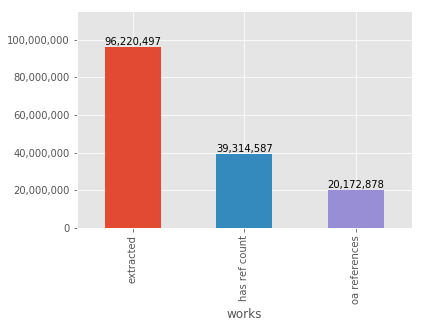

In [8]:
printmd('Out of the *{:,}* works with references in Crossref, **{:.1f}%** are open (*{:,}*).'.format(
    int(df_summary['reference_count']['count_non_zero']),
    100.0 * df_summary['has_references']['count_non_zero'] / df_summary['reference_count']['count_non_zero'],
    int(df_summary['has_references']['count_non_zero'])
))

show_counts([
    ['extracted', df_summary['has_references']['count']],
    ['has ref count', df_summary['reference_count']['count_non_zero']],
    ['oa references', df_summary['has_references']['count_non_zero']]
], 'works')

Out of the *1,103,882,760* references in Crossref, **53.0%** are open (*584,539,432*).

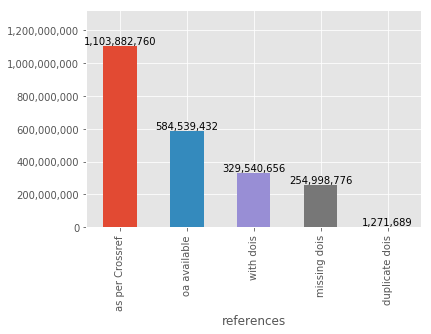

In [9]:
printmd('Out of the *{:,}* references in Crossref, **{:.1f}%** are open (*{:,}*).'.format(
    int(df_summary['reference_count']['sum']),
    100.0 * df_summary['num_references']['sum'] / df_summary['reference_count']['sum'],
    int(df_summary['num_references']['sum'])
))

show_counts([
    ['as per Crossref', df_summary['reference_count']['sum']],
    ['oa available', df_summary['num_references']['sum']],
    ['with dois', df_summary['num_references']['sum'] - df_summary['num_citations_without_doi']['sum']],
    ['missing dois', df_summary['num_citations_without_doi']['sum']],
    ['duplicate dois', df_summary['num_duplicate_citation_dois']['sum']]
], 'references')

In [10]:
df_reference_stat = pd.read_csv(os.path.join(data_path, reference_stats_filename), sep='\t')
df_reference_stat['examples'] = df_reference_stat['examples'].map(lambda x: json.loads(x))
df_reference_stat['examples_without_source'] = df_reference_stat['examples'].map(lambda x: [y[1] for y in x])
df_reference_stat = df_reference_stat.sort_values('count', ascending=False)
df_reference_stat.drop('examples', axis=1).head(10)

,type,key,count,examples_without_source
0,key_combination,author|first-page|journal-title|key|volume|year,50639096,"[{'year': '1979', 'journal-title': 'Ann Génét'..."
781428,year,NaN,49374548,[{'journal-title': 'Based on Survey Conducted ...
1,key_combination,key|unstructured,42607282,"[{'unstructured': 'Canterbury v Spence, 464 F...."
730958,total_first_subject_area,NaN,37153474,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
2,key_combination,author|first-page|journal-title|key|unstructur...,35662583,[{'unstructured': 'et al. (1990). A longitudin...
3,key_combination,author|key|volume-title|year,28514946,"[{'year': '1978', 'author': 'Temtamy', 'volume..."
4,key_combination,article-title|author|first-page|journal-title|...,24278473,[{'article-title': 'Microtubule retraction int...
731281,total_publisher,Elsevier BV,15131331,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
5,key_combination,author|key|unstructured|volume-title|year,10354764,"[{'year': '1994', 'unstructured': 'American Ps..."
80967,non_oa_ref_publisher,Elsevier BV,10002904,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"


In [11]:
set(df_reference_stat['type'].values)

{'key_combination',
 'non_oa_ref_countainer_title',
 'non_oa_ref_created',
 'non_oa_ref_first_subject_area',
 'non_oa_ref_publisher',
 'total_countainer_title',
 'total_created',
 'total_first_subject_area',
 'total_publisher',
 'year'}

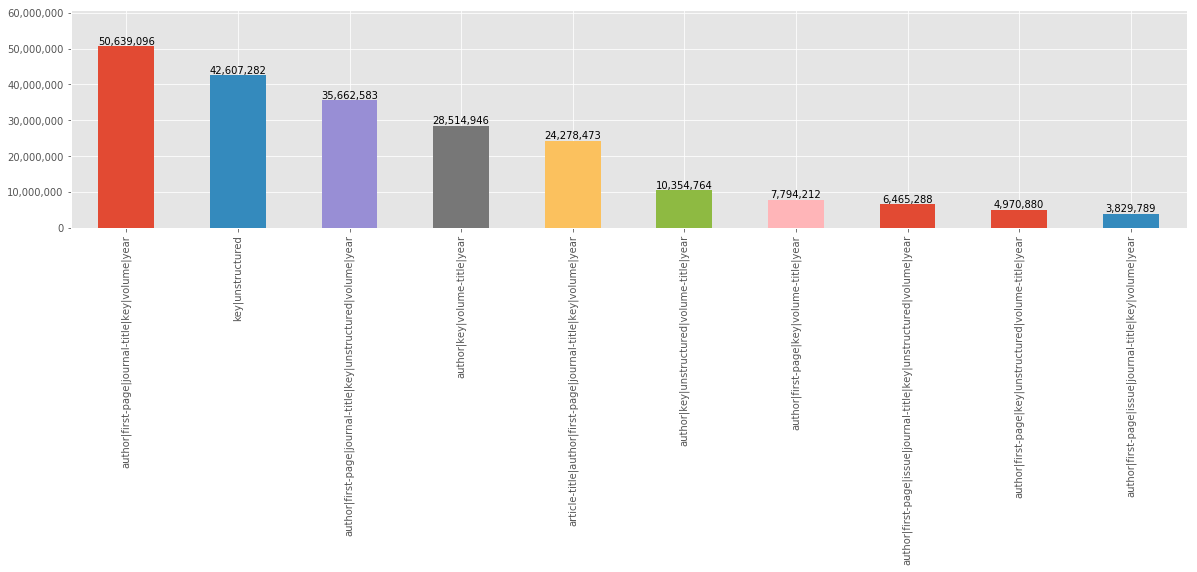

In [12]:
df_reference_key_combination_stat = (
    df_reference_stat[df_reference_stat['type'] == 'key_combination']
    .drop('type', axis=1)
    .set_index('key')
)
show_counts(df_reference_key_combination_stat['count'].head(10), figsize=(20, 4))

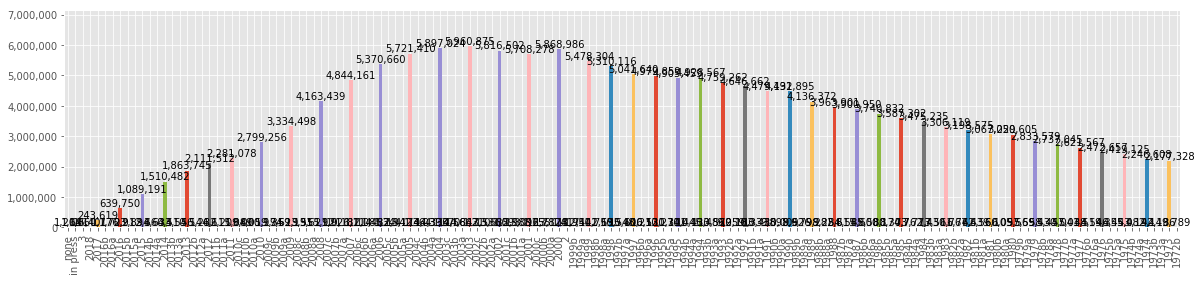

In [13]:
df_reference_year_stat = (
    df_reference_stat[df_reference_stat['type'] == 'year']
    .drop('type', axis=1)
    .sort_values('key', ascending=False)
    .set_index('key')
)
df_reference_year_stat = df_reference_year_stat[df_reference_year_stat['count'] > 1000]
show_counts(df_reference_year_stat['count'].head(150), figsize=(20, 4))

In [14]:
set(df_reference_stat['type'])

{'key_combination',
 'non_oa_ref_countainer_title',
 'non_oa_ref_created',
 'non_oa_ref_first_subject_area',
 'non_oa_ref_publisher',
 'total_countainer_title',
 'total_created',
 'total_first_subject_area',
 'total_publisher',
 'year'}

key
Elsevier BV                                                 0.661072
IEEE                                                        0.879861
Institute of Electrical and Electronics Engineers (IEEE)    0.678026
Elsevier                                                    0.551773
Ovid Technologies (Wolters Kluwer Health)                   0.335140
IOP Publishing                                              0.762479
American Chemical Society (ACS)                             0.306955
The Optical Society                                         0.808874
CRC Press                                                   0.499798
Mary Ann Liebert Inc                                        0.820934
Name: count, dtype: float64


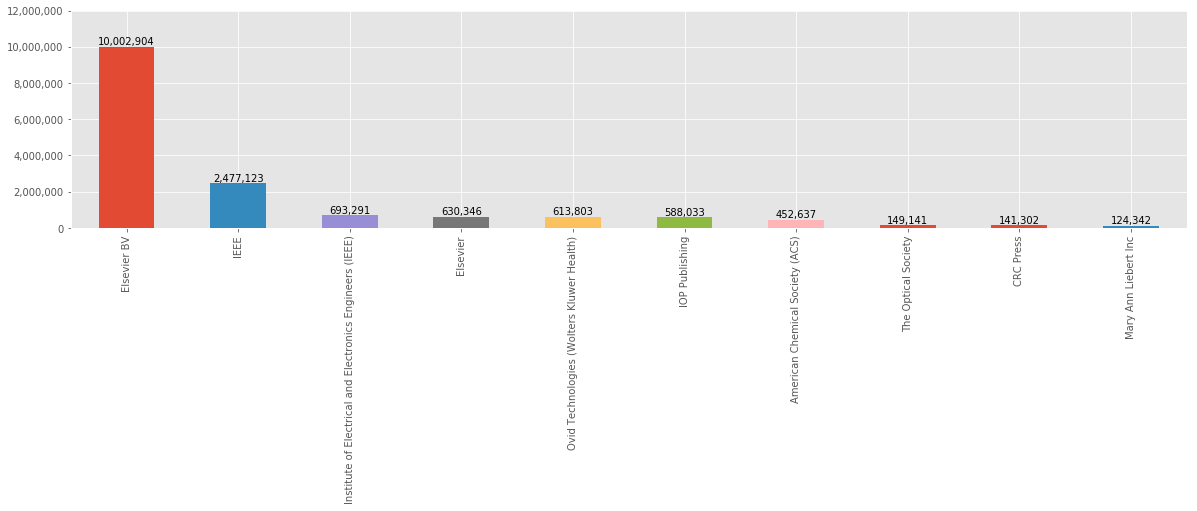

In [15]:
df_temp = (
    df_reference_stat[df_reference_stat['type'] == 'non_oa_ref_publisher']
    .drop('type', axis=1)
    .set_index('key')
)

df_temp_total = (
    df_reference_stat[df_reference_stat['type'] == 'total_publisher']
    .drop('type', axis=1)
    .set_index('key')
)
# print(df_temp_total.head())
print((df_temp['count'].head(10) / df_temp_total['count']).dropna())
show_counts(df_temp['count'].head(10), figsize=(20, 4))

key
IEEE                                                        0.879861
Mary Ann Liebert Inc                                        0.820934
The Optical Society                                         0.808874
IOP Publishing                                              0.762479
Institute of Electrical and Electronics Engineers (IEEE)    0.678026
Name: count, dtype: float64


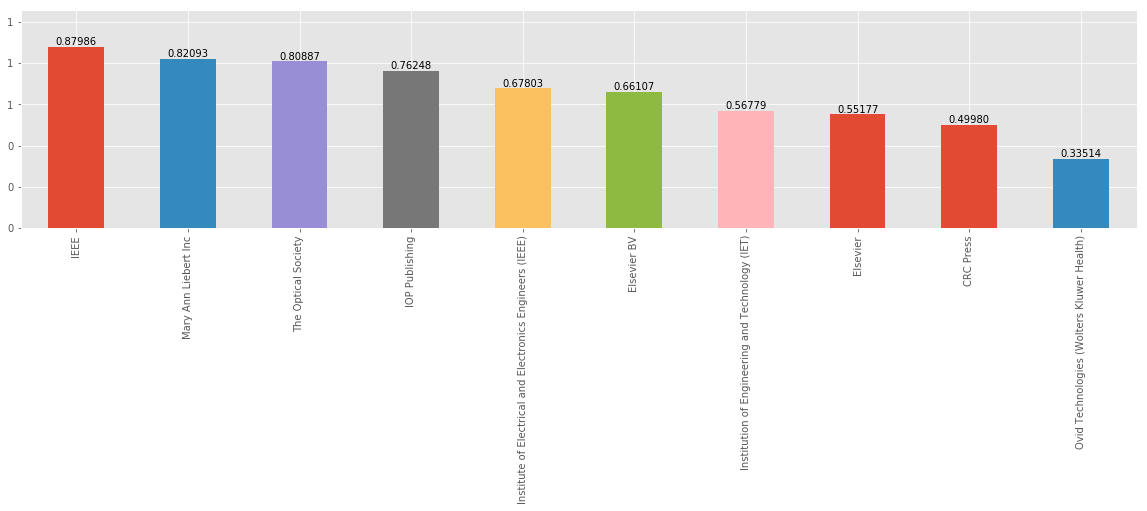

In [16]:
df_temp = (
    df_reference_stat[df_reference_stat['type'] == 'non_oa_ref_publisher']
    .drop('type', axis=1)
    .set_index('key')
)
df_temp2 = (
    df_reference_stat[df_reference_stat['type'] == 'total_publisher']
    .drop('type', axis=1)
    .set_index('key')
)
df_temp = df_temp[df_temp['count'] > 100000]
# df_temp = df_temp[df_temp2['count'] > 10000]
# df_temp2 = df_temp2[df_temp2['count'] > 10000]
df_temp3 = df_temp.copy()
df_temp3['count'] = df_temp3['count'] / df_temp2['count']
print(df_temp3['count'].sort_values(ascending=False).head())
show_counts(df_temp3['count'].sort_values(ascending=False).head(10), number_format='{:,.5f}', figsize=(20, 4))

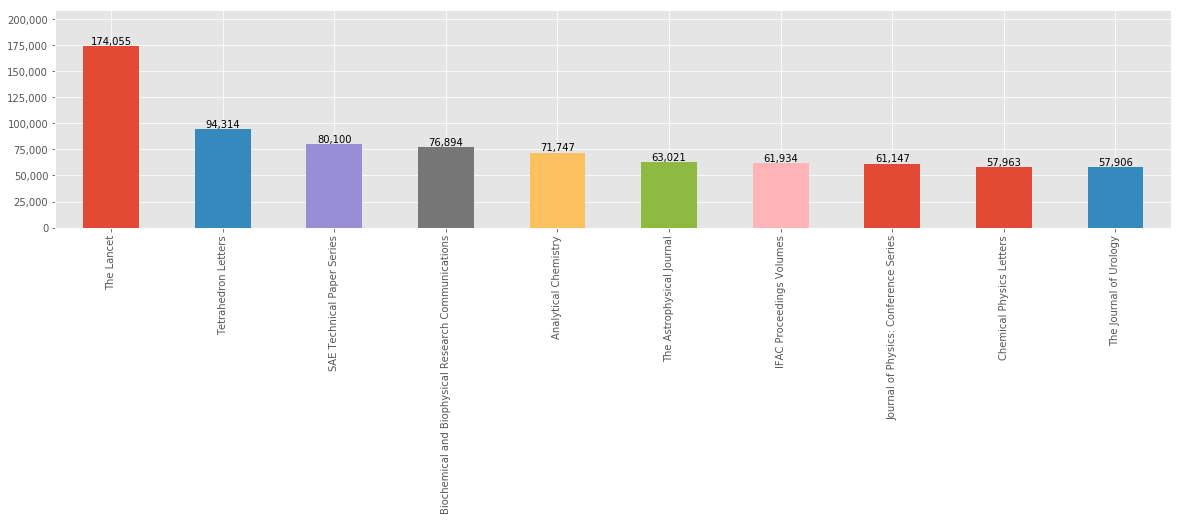

In [17]:
df_temp = (
    df_reference_stat[df_reference_stat['type'] == 'non_oa_ref_countainer_title']
    .drop('type', axis=1)
    .set_index('key')
)
show_counts(df_temp['count'].head(10), figsize=(20, 4))

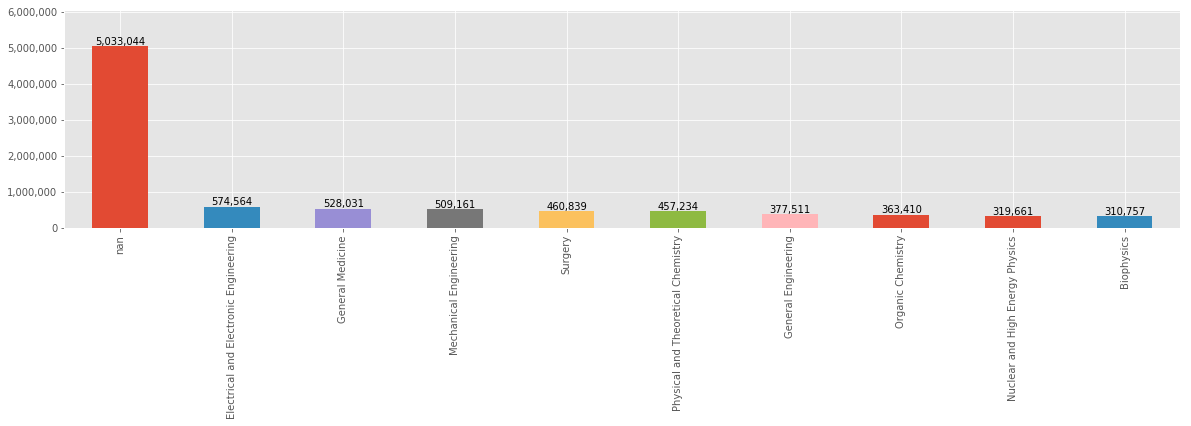

In [18]:
df_temp = (
    df_reference_stat[df_reference_stat['type'] == 'non_oa_ref_first_subject_area']
    .drop('type', axis=1)
    .set_index('key')
)
show_counts(df_temp['count'].head(10), figsize=(20, 4))

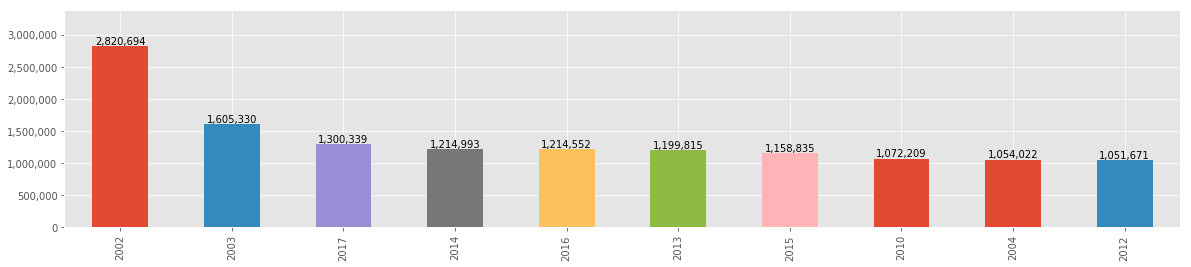

In [19]:
df_temp = (
    df_reference_stat[df_reference_stat['type'] == 'non_oa_ref_created']
    .drop('type', axis=1)
    .set_index('key')
)
show_counts(df_temp['count'].head(10), figsize=(20, 4))

## More detailed analysis on the summaries by type and publisher

In [20]:
df_summary_by_type_and_publisher = pd.read_csv(
    os.path.join(data_path, summary_by_type_and_publisher_stats_filename), sep='\t'
).rename(columns={
    'reference_count': 'reference_count_crossref',
    'num_references': 'reference_count_oa'
})

# fill na type and publisher with blank (otherwise causes issues with groupby)
df_summary_by_type_and_publisher[['type', 'publisher']] = (
    df_summary_by_type_and_publisher[['type', 'publisher']].fillna('')
)

# drop non-numeric stat value 'type' and convert to numeric values
df_summary_by_type_and_publisher = df_summary_by_type_and_publisher[
    df_summary_by_type_and_publisher['stat'] != 'type'
].apply(pd.to_numeric, errors='ignore')

df_summary_by_type_and_publisher.head(3)

,type,publisher,stat,doi,title,reference_count_crossref,referenced_by_count,created,container_title,author_count,first_subject_area,subject_areas,has_references,reference_count_oa,num_citations_without_doi,num_duplicate_citation_dois,cited_dois,debug
0,,,count,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,,,count_non_zero,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN
2,,,count_numeric,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,NaN,NaN


In [21]:
# get an overview of the work count by type and publisher
df_summary_by_type_and_publisher_work_counts = df_summary_by_type_and_publisher[
    df_summary_by_type_and_publisher['stat'] == 'count'
].groupby(['type', 'publisher'])['doi'].sum().sort_values(ascending=False).to_frame('work_count')

df_summary_by_type_and_publisher_non_zero_counts = df_summary_by_type_and_publisher[
    df_summary_by_type_and_publisher['stat'] == 'count_non_zero'
].groupby(['type', 'publisher'])[[
    'reference_count_crossref', 'reference_count_oa'
]].sum().rename(columns={
    'reference_count_crossref': 'has_nonzero_reference_count_crossref',
    'reference_count_oa': 'has_nonzero_reference_count_oa'
})

df_summary_by_type_and_publisher_work_counts = df_summary_by_type_and_publisher_work_counts.merge(
    df_summary_by_type_and_publisher_non_zero_counts, how='outer', left_index=True, right_index=True
).astype(int)

# sanity check
assert int(df_summary_by_type_and_publisher_work_counts.sum()[0]) == int(df_summary['has_references']['count'])

df_summary_by_type_and_publisher_work_counts.sort_values(
    'work_count', ascending=False
).head().applymap(format_count)

work_count  \
type                publisher                        
journal-article     Elsevier BV         15,128,420   
                    Wiley-Blackwell      7,278,458   
                    Springer Nature      7,128,803   
                    Informa UK Limited   3,911,127   
proceedings-article IEEE                 2,805,682   

                                       has_nonzero_reference_count_crossref  \
type                publisher                                                 
journal-article     Elsevier BV                                  10,002,904   
                    Wiley-Blackwell                               5,002,366   
                    Springer Nature                               4,668,529   
                    Informa UK Limited                            2,500,754   
proceedings-article IEEE                                          2,474,970   

                                       has_nonzero_reference_count_oa  
type                publisher                                          
journal-article     Elsevier BV                                     0  
                    Wiley-Blackwell                         5,002,366  
                    Springer Nature                         4,641,856  
                    Informa UK Limited                      2,484,014  
proceedings-article IEEE                                            0

In [22]:
# get total counts
(
    df_summary_by_type_and_publisher_work_counts.reset_index()
    .drop(['type', 'publisher'], axis=1)
    .sum(axis=0)
    .to_frame('total')
    .applymap(format_count)
)

,total
work_count,"96,220,497"
has_nonzero_reference_count_crossref,"39,314,587"
has_nonzero_reference_count_oa,"20,172,878"


In [23]:
# get an overview of the work count by type
(
    df_summary_by_type_and_publisher_work_counts.reset_index().groupby('type')
    .sum().sort_values(by='work_count', ascending=False).head().applymap(format_count)
)

,work_count,has_nonzero_reference_count_crossref,has_nonzero_reference_count_oa
type,,,
journal-article,"71,077,307","34,250,817","18,845,256"
book-chapter,"11,190,211","1,774,769","858,906"
proceedings-article,"5,221,729","3,027,629","261,095"
component,"3,193,111",10,0
dataset,"1,658,520","44,306",12


In [24]:
# treat the type as journal / non-journal article
def type_to_journal_non_journal_article(df):
    df = df.copy()
    df['type'] = df['type'].map(lambda x: 'non-journal-article' if x != 'journal-article' else x)
    return df

(
    type_to_journal_non_journal_article(
        df_summary_by_type_and_publisher_work_counts.reset_index()
    )
    .groupby('type')
    .sum().sort_values(by='work_count', ascending=False).head().applymap(format_count)
)

,work_count,has_nonzero_reference_count_crossref,has_nonzero_reference_count_oa
type,,,
journal-article,"71,077,307","34,250,817","18,845,256"
non-journal-article,"25,143,190","5,063,770","1,327,622"


In [25]:
# by publisher
def select_top_publishers(df, count=5):
    top_publishers = (
        df.groupby('publisher').sum()
        .sort_values(by='work_count', ascending=False)
        .index.values
    )
    return df[df['publisher'].isin(top_publishers[:count])]

(
    type_to_journal_non_journal_article(
        select_top_publishers(df_summary_by_type_and_publisher_work_counts.reset_index())
    )
    .groupby(['type', 'publisher'])
    .sum().sort_values(by='work_count', ascending=False).applymap(format_count)
)

work_count  \
type                publisher                        
journal-article     Elsevier BV         15,128,420   
                    Wiley-Blackwell      7,278,458   
                    Springer Nature      7,128,803   
                    Informa UK Limited   3,911,127   
non-journal-article IEEE                 2,815,358   
                    Wiley-Blackwell        351,173   
                    Springer Nature         20,049   
                    Informa UK Limited       2,975   
                    Elsevier BV              2,911   

                                       has_nonzero_reference_count_crossref  \
type                publisher                                                 
journal-article     Elsevier BV                                  10,002,904   
                    Wiley-Blackwell                               5,002,366   
                    Springer Nature                               4,668,529   
                    Informa UK Limited                            2,500,754   
non-journal-article IEEE                                          2,477,123   
                    Wiley-Blackwell                                  12,999   
                    Springer Nature                                       0   
                    Informa UK Limited                                    0   
                    Elsevier BV                                           0   

                                       has_nonzero_reference_count_oa  
type                publisher                                          
journal-article     Elsevier BV                                     0  
                    Wiley-Blackwell                         5,002,366  
                    Springer Nature                         4,641,856  
                    Informa UK Limited                      2,484,014  
non-journal-article IEEE                                            0  
                    Wiley-Blackwell                            12,999  
                    Springer Nature                                 0  
                    Informa UK Limited                              0  
                    Elsevier BV                                     0

In [26]:
def normalise_publisher(df):
    elsevier_names = [
        s for s in df['publisher'].unique()
        if not pd.isnull(s) and 'elsevier' in s.lower()
    ]
    return df.replace({
        'publisher': {s: 'Elsevier (all)' for s in elsevier_names}
    })

# by normalised publisher
(
    select_top_publishers(normalise_publisher(type_to_journal_non_journal_article(
        df_summary_by_type_and_publisher_work_counts.reset_index()
    )))
    .groupby(['type', 'publisher'])
    .sum().sort_values(by='work_count', ascending=False).applymap(format_count)
)

work_count  \
type                publisher                        
journal-article     Elsevier (all)      15,128,420   
                    Wiley-Blackwell      7,278,458   
                    Springer Nature      7,128,803   
                    Informa UK Limited   3,911,127   
non-journal-article IEEE                 2,815,358   
                    Elsevier (all)       1,145,500   
                    Wiley-Blackwell        351,173   
                    Springer Nature         20,049   
                    Informa UK Limited       2,975   

                                       has_nonzero_reference_count_crossref  \
type                publisher                                                 
journal-article     Elsevier (all)                               10,002,904   
                    Wiley-Blackwell                               5,002,366   
                    Springer Nature                               4,668,529   
                    Informa UK Limited                            2,500,754   
non-journal-article IEEE                                          2,477,123   
                    Elsevier (all)                                  630,763   
                    Wiley-Blackwell                                  12,999   
                    Springer Nature                                       0   
                    Informa UK Limited                                    0   

                                       has_nonzero_reference_count_oa  
type                publisher                                          
journal-article     Elsevier (all)                                  0  
                    Wiley-Blackwell                         5,002,366  
                    Springer Nature                         4,641,856  
                    Informa UK Limited                      2,484,014  
non-journal-article IEEE                                            0  
                    Elsevier (all)                                417  
                    Wiley-Blackwell                            12,999  
                    Springer Nature                                 0  
                    Informa UK Limited                              0

In [27]:
# sanity check, the grouped summary should equal the ungrouped summary
df_summary_by_type_and_publisher_sums = df_summary_by_type_and_publisher[
    df_summary_by_type_and_publisher['stat'] == 'sum'
]
total_reference_count_according_to_crossref = df_summary_by_type_and_publisher_sums['reference_count_crossref'].sum()
assert total_reference_count_according_to_crossref == df_summary['reference_count']['sum']
(
    df_summary_by_type_and_publisher_sums[['reference_count_crossref', 'reference_count_oa']]
    .sum()
    .map(format_count)
    .to_frame('sum')
)

,sum
reference_count_crossref,"1,103,882,760"
reference_count_oa,"584,539,432"


In [28]:
# total references by type
(
    df_summary_by_type_and_publisher_sums.groupby('type')
    [['reference_count_crossref', 'reference_count_oa']]
    .sum()
    .sort_values('reference_count_crossref', ascending=False)
    .head()
    .applymap(format_count)
)

,reference_count_crossref,reference_count_oa
type,,
journal-article,"976,424,623","541,875,614"
book-chapter,"81,005,607","31,991,308"
proceedings-article,"39,541,950","4,106,144"
reference-entry,"6,196,627","6,196,627"
other,"318,327","194,770"


In [29]:
# Publishers with the highest amount of references
(
    df_summary_by_type_and_publisher_sums.groupby('publisher')
    .sum()[['reference_count_crossref', 'reference_count_oa']]
    .sort_values(by='reference_count_crossref', ascending=False)
).head().applymap(format_count)

,reference_count_crossref,reference_count_oa
publisher,,
Elsevier BV,"300,048,254",0
Springer Nature,"131,741,193","130,583,975"
Wiley-Blackwell,"131,500,799","131,500,799"
Informa UK Limited,"70,570,901","70,201,522"
Elsevier,"37,030,694","14,856"


In [30]:
# Elsevier uses mutliple names, treat them as one
elsevier_names = [
    s for s in df_summary_by_type_and_publisher_sums['publisher'].unique()
    if not pd.isnull(s) and 'elsevier' in s.lower()
]
print(elsevier_names)
df_summary_by_type_and_publisher_sums_merged_publisher = (
    df_summary_by_type_and_publisher_sums.replace({
        'publisher': {s: 'Elsevier (all)' for s in elsevier_names}
    })
)

['Elsevier', 'Elsevier IFAC', 'Elsevier, IFAC', 'IFAC, Elsevier', 'Elsevier Inc.', 'Elsevier, Germany', 'Elsevier BV', '"Elsevier",', 'Elsevier Masson', 'Elsevier Pub. Co.', 'Elsevier Pub. Co.,', 'Elsevier,', 'Publishing company "Elsevier,",']


In [31]:
# Publishers with the highest amount of references - this time with merged publisher names
(
    df_summary_by_type_and_publisher_sums_merged_publisher.groupby('publisher')
    .sum()[['reference_count_crossref', 'reference_count_oa']]
    .sort_values(by='reference_count_crossref', ascending=False)
).head().applymap(format_count)

,reference_count_crossref,reference_count_oa
publisher,,
Elsevier (all),"337,078,948","14,856"
Springer Nature,"131,741,193","130,583,975"
Wiley-Blackwell,"131,500,799","131,500,799"
Informa UK Limited,"70,570,901","70,201,522"
IEEE,"31,870,626",0


In [32]:
# Publishers with the highest amount of references (by type) - this time with merged publisher names
(
    df_summary_by_type_and_publisher_sums_merged_publisher.groupby(['type', 'publisher'])
    .sum()[['reference_count_crossref', 'reference_count_oa']]
    .sort_values(by='reference_count_crossref', ascending=False)
).head().applymap(format_count)

reference_count_crossref reference_count_oa
type            publisher                                                     
journal-article Elsevier (all)                  300,048,254                  0
                Springer Nature                 131,741,193        130,583,975
                Wiley-Blackwell                 130,605,848        130,605,848
                Informa UK Limited               70,570,901         70,201,522
book-chapter    Elsevier (all)                   37,030,694             14,856